In [152]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import math

In [153]:
# load species name -> species id lookup dict
name_to_id_df = pd.read_csv('species codes.csv', encoding='unicode_escape')
name_to_id_dict = {}
for _, row in name_to_id_df.iterrows():
    name_to_id_dict["{}- {}".format(row['species_primary_common_name'], row['species_scientific_name'])] = row['species_id']
    name_to_id_dict["{}-{}".format(row['species_primary_common_name'], row['species_scientific_name'])] = row['species_id']

In [154]:
ref_df = pd.read_csv('reference_data/pvt_kerala.csv')
cit_df = pd.read_csv('citizenData/Kerala_citizenData.csv')

In [155]:
cit_df.head()

,Observation_ID,Date_of_observation,User_id,User_Tree_id,Species_name,Lat,Long,State_name,Leaves_fresh,Leaves_mature,Leaves_old,Flowers_bud,Flowers_open,Flowers_male,Flowers_Female,Fruits_unripe,Fruits_ripe,Fruits_open,Year,Week
0,467438.0,2020-10-13,22219.0,94805.0,Aabehayat Mango- Mangifera indica,9.78619,76.44449,Kerala,2.0,2.0,1.0,0.0,0.0,-2.0,-2.0,0.0,0.0,-2.0,2020,37
1,489809.0,2021-03-02,22219.0,94803.0,Aabehayat Mango- Mangifera indica,9.78499,76.44959,Kerala,1.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2021,7
2,544927.0,2021-11-23,22219.0,94805.0,Aabehayat Mango- Mangifera indica,9.78619,76.44449,Kerala,1.0,2.0,1.0,0.0,0.0,-2.0,-2.0,0.0,0.0,-2.0,2021,42
3,544928.0,2021-11-24,22219.0,94805.0,Aabehayat Mango- Mangifera indica,9.78619,76.44449,Kerala,1.0,2.0,1.0,1.0,1.0,-2.0,-2.0,0.0,0.0,-2.0,2021,42
4,489810.0,2021-03-09,22219.0,94803.0,Aabehayat Mango- Mangifera indica,9.78499,76.44959,Kerala,1.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2021,8


In [156]:
ref_df.head()

,Unnamed: 0,id,species_id,species_name,updated_at,week,Leaves_fresh,Leaves_mature,Leaves_old,Flowers_bud,Flowers_open,Flowers_male,Flowers_Female,Fruits_unripe,Fruits_ripe,Fruits_open
0,0,1,1001,NaN,NaN,0,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2
1,1,1,1001,NaN,NaN,1,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2
2,2,1,1001,NaN,NaN,2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2
3,3,1,1001,NaN,NaN,3,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2
4,4,1,1001,NaN,NaN,4,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2


In [157]:
len(cit_df), len(ref_df)

(487201, 11472)

In [158]:
cit_df['Species_name'].value_counts()

Species_name
Jackfruit- Artocarpus heterophyllus              79736
Mango (all varieties)- Mangifera indica          76274
Teak- Tectona grandis                            26293
Tamarind- Tamarindus indica                      25411
Indian laburnum- Cassia fistula                  22688
                                                 ...  
Olour Mango- Mangifera indica                        1
Meethabhaji-Champereia manillana                     1
Chinar-Platanus orientalis                           1
Bhimal-Grewia optiva                                 1
Himalayan rhododendron- Rhododendron arboreum        1
Name: count, Length: 169, dtype: int64

In [159]:
# get id of Jackfruit- Artocarpus heterophyllus
species_name = 'Jackfruit- Artocarpus heterophyllus'
species_id = name_to_id_dict['Jackfruit- Artocarpus heterophyllus']
jack_df = cit_df[cit_df['Species_name'] == 'Jackfruit- Artocarpus heterophyllus']

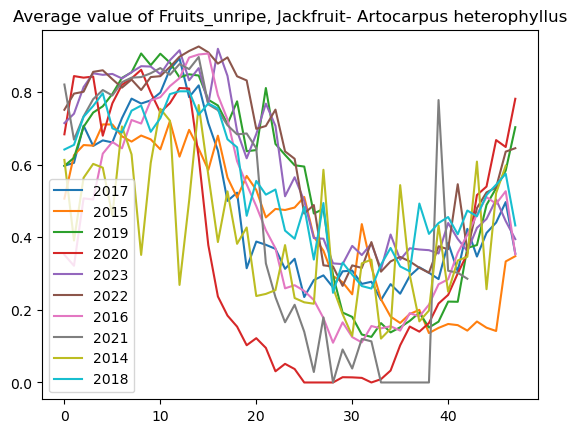

In [160]:
# plot percentage of observations with attr recorded
def condense_positives(val):
    if val > 1:
        return 1
    return val

attr = 'Fruits_unripe'
for year in jack_df['Year'].unique():
    jack_df_year = jack_df[jack_df['Year'] == year]
    attr_week_pairs = []
    for week in range(48):
        jack_df_year_week = jack_df_year[jack_df_year['Week'] == week]
        attr_arr = np.array(jack_df_year_week[attr])
        attr_arr = attr_arr[~np.isnan(attr_arr)]
        attr_arr = np.array(list(map(condense_positives, list(attr_arr))))
        attr_arr = list(filter(lambda x: x >= 0, list(attr_arr)))
        if len(attr_arr) > 0:
            mean = np.mean(attr_arr)
            std = math.sqrt(np.mean((attr_arr - mean)**2))
            attr_week_pairs.append((week, mean, std))
    weeks = list(map(lambda t: t[0], attr_week_pairs))
    means = list(map(lambda t: t[1], attr_week_pairs))
    plt.plot(weeks, means, label=year)

plt.title("Average value of {}, {}".format(attr, species_name))
plt.legend()
plt.show()

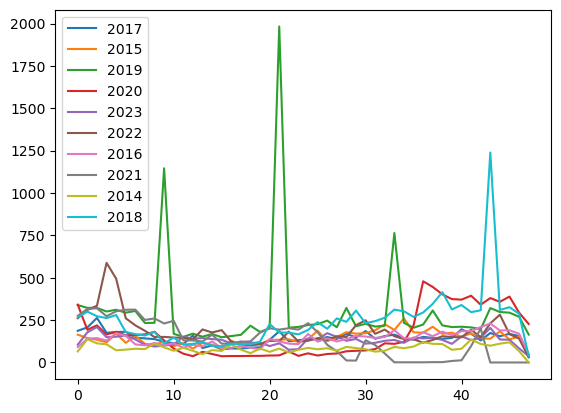

In [161]:
# plot total number of observations per week for jackfruit in Kerala
for year in jack_df['Year'].unique():
    weeks = list(range(48))
    nobs = list()
    for week in range(48):
        jack_df_year = jack_df[jack_df['Year'] == year]
        jack_df_year_week = jack_df_year[jack_df_year['Week'] == week]
        nobs.append(len(jack_df_year_week))
    plt.plot(weeks, nobs, label=year)
plt.legend()
plt.show()

In [209]:
# get the week a tree transitions for a certain attribute
def get_transition_week(tree_df, attr, zero_to_one=True):
    transition_weeks = []
    for week in tree_df['Week'].unique():
        tree_df_week = tree_df[tree_df['Week'] == week]
        tree_df_next_week = tree_df[tree_df['Week'] == week + 1]
        if len(tree_df_week) > 0 and len(tree_df_next_week) > 0:
            tree_df_week_attr_zero = tree_df_week[tree_df_week[attr] == 0]
            tree_df_week_attr_one = tree_df_week[tree_df_week[attr] == 1]
            tree_df_next_week_attr_zero = tree_df_next_week[tree_df_next_week[attr] == 0]
            tree_df_next_week_attr_one = tree_df_next_week[tree_df_next_week[attr] == 1]
            if zero_to_one:
                if len(tree_df_week_attr_zero) > 0 and len(tree_df_week_attr_one) == 0 and len(tree_df_next_week_attr_one) > 0:
                    transition_weeks.append(week)
            else:
                if len(tree_df_week_attr_one) > 0 and len(tree_df_week_attr_zero) == 0 and len(tree_df_next_week_attr_zero) > 0:
                    transition_weeks.append(week)
    return transition_weeks

# for jackfruit, get average week where phenophase switches from fruits_ripe to fruits_unripe
for year in jack_df['Year'].unique():
    jack_df_year = jack_df[jack_df['Year'] == year]
    
jack_df.sort_values(by='User_Tree_id')
transition_weeks = []

total = len(jack_df['User_Tree_id'].unique())
i = 0
for user_tree_id in jack_df['User_Tree_id'].unique():
    i += 1
    jack_df_for_tree_id = jack_df[jack_df['User_Tree_id'] == user_tree_id].sort_values(by=['Year', 'Week'], ascending=[True, True])
    transition_weeks += get_transition_week(jack_df_for_tree_id, 'Fruits_unripe')
    if i % 100 == 0:
        print("{}% finished".format(100 * i/total))

1.128158844765343% finished
2.256317689530686% finished
3.384476534296029% finished
4.512635379061372% finished
5.640794223826715% finished
6.768953068592058% finished
7.897111913357401% finished
9.025270758122744% finished
10.153429602888087% finished
11.28158844765343% finished
12.409747292418773% finished
13.537906137184116% finished
14.666064981949459% finished
15.794223826714802% finished
16.922382671480143% finished
18.050541516245488% finished
19.17870036101083% finished
20.306859205776174% finished
21.435018050541515% finished
22.56317689530686% finished
23.6913357400722% finished
24.819494584837546% finished
25.947653429602887% finished
27.075812274368232% finished
28.203971119133573% finished
29.332129963898918% finished
30.46028880866426% finished
31.588447653429604% finished
32.71660649819495% finished
33.84476534296029% finished
34.97292418772563% finished
36.101083032490976% finished
37.22924187725632% finished
38.35740072202166% finished
39.485559566787% finished
40.6137

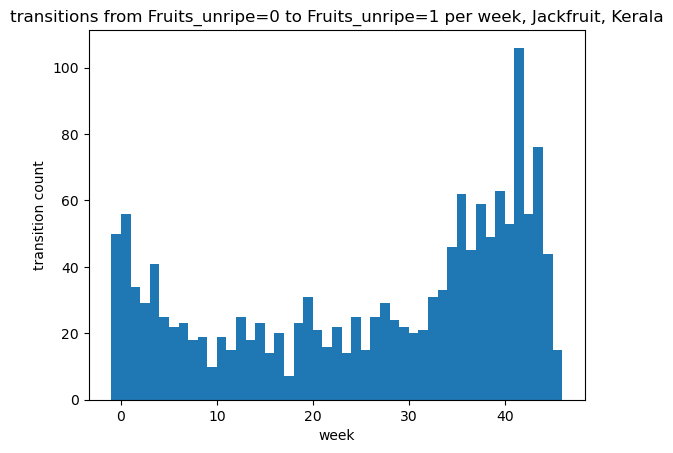

In [210]:
# get counts for each transition week
counts = pd.Series(transition_weeks).value_counts()
count_idxs, counts = list(counts.index), list(counts)
count_idxs, counts

# plot the distribution of transitions
plt.title("transitions from {}={} to {}={} per week, Jackfruit, Kerala".format(attr, 0, attr, 1))
plt.xlabel("week")
plt.ylabel("transition count")
plt.bar(x=count_idxs, height=counts, width=-1, align='edge')
plt.show()

# Notes
- Can also just plot the weeks where ripe fruits are first observed, when none had been observed the previous week